# Guía Introductoria

La idea de este documento es brindar una breve guía descriptiva de la utilización de la librería Sympy como herramienta para la resolución del TLC n° 2.




---


<font color='red' size=5>**Consideraciones a tener en cuenta:**</font>

Sympy resulta de gran utilidad para la resolución por software de problemas matemáticos por medio de operaciones con variables simbólicas, sin embargo, la librería aún no es tan robusta en el cálculo de Transformadas de Laplace, especialmente en el cálculo de transformadas inversas. La capacidad de cálculo de la antitransformada generalmente depende en gran medida de ***cómo*** expresamos nuestra función de interés sobre la cual queremos aplicar el operador. Es por esto que a continuación presentamos algunas observaciones a tener en cuenta que podrían ser de utilidad en el uso general de la librería:


*  Sympy no tiene gran capacidad para manejar expresiones que involucren constantes expresadas como flotantes. En su lugar debemos trabajar con expresiones racionales, definidas por medio de la función *Rational()*.



* Cuando el software no sea capaz de realizar el cálculo que le estamos solicitando es probable que debamos reexpresar nuestra función de manera factorizada o como una combinación lineal de expresiones más simples. Si quisiéramos expresar expresar nuestra función como fraciones simples podríamos hacerlo mediante el método *apart()*.

* Muchas veces los resultados devueltos están expresados en términos de constantes númericas que son prácticamente imposibles de interpretar y por lo tanto se vuelve difícil corroborar si el resultado devuelto por el software es correcto. Una forma de solucionar esto es forzar a que se evalúen las constantes numéricas y se expresen con una cantidad de digitos que nosotros deseemos. Esto podemos hacerlo mediante el método *evalf()*.


# *Introducción a Sympy*


## *Se importan librerias y se definen funciones auxiliares*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
import sympy as sp

# Se define el formato de las gráficas como svg para una mayor calidad
%config InlineBackend.figure_format = 'svg'

# Se define la Transformada de Laplace
def laplace(f):
    s = symbols('s')
    t = symbols ('t',real=True)
    return sp.laplace_transform(f, t, s, noconds=True)
# Se define la Transformada de Laplace inversa
def ilaplace(F):
    s = symbols('s')
    t = symbols ('t',real=True)
    return sp.inverse_laplace_transform(F, s, t,noconds=True)

## Definición de símbolos

El eje central de esta librería es el manejo de expresiones simbólicas. Para definir una expresión simbólica, primeramente debemos definir los *símbolos* que vamos a utilizar o que van a estar relacionados de cierta manera con nuestra expresión

In [2]:
s = symbols('s')
# Por defecto, las variables simbólicas son complejas. Por tanto si deseamos
# definir una variable real, debemos aclararlo
t = symbols('t',real = True)

## Definición y manipulación de expresiones simbólicas

Hecho esto, estamos en condiciones de definir expresiones simbólicas. Por ejemplo $f(t) = t^2+\cos(3t)$

In [3]:
f_t = sp.cos(3*t)+t**2
f_t

t**2 + cos(3*t)

Ahora podemos operar y manipular nuestra función $f(t)$. Por ejemplo, tomando su derivada

In [4]:
f_t.diff()

2*t - 3*sin(3*t)

O calculando $\mathscr{L}\{f(t)\}$

In [5]:
F_s = laplace(f_t)
F_s

s/(s**2 + 9) + 2/s**3

Y por supuesto, la transformada inversa $\mathscr{L}^{-1}\{f(t)\}$

In [6]:
f_t_ = ilaplace(F_s)
f_t_

t**2*Heaviside(t) + cos(3*t)*Heaviside(t)

Vemos que recuperamos la funcion $f(t)$ original. Por otro lado, vemos que obtuvimos una función $θ(t)$. Esta función es la que utiliza Sympy para expresar al escalón unitario de Heaviside:

In [7]:
sp.Heaviside(t)

Heaviside(t)

Un detalle importante a tener en cuenta es que la función escalón unitario de Heaviside en Sympy está definida como

$$
\
$$

In [8]:
f_t_.subs(t,0)

1/2

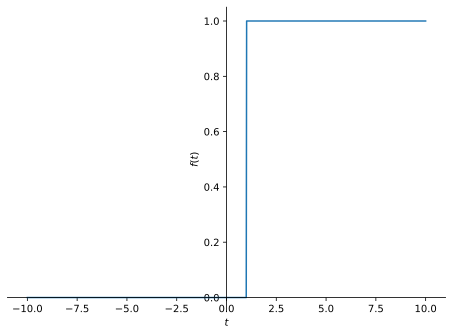

In [9]:
sp.plot(sp.Heaviside(t-1));

Como acabamos de ver, *sp.plot()* nos permite obtener de forma rápida la gráfica de una expresión simbólica





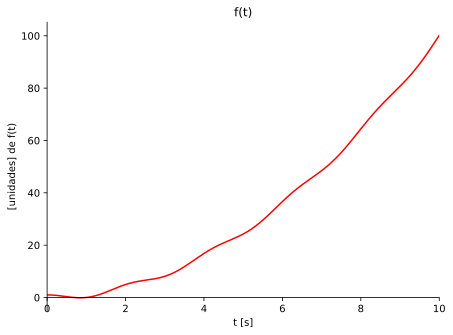

In [10]:
sp.plot(f_t,xlim=(0,10),xlabel = 't [s]', ylabel='[unidades] de f(t)',title='f(t)',line_color='red');

## *Graficación con Matplotlib*

Si bien la función *plot()* de Sympy nos permite graficar expresiones simbólicas, en general es recomendable utilizar la librería Matplotlib para la representación de funciones ya que ésta presenta un conjunto mayor de herramientas de graficación que nos permite tener un mayor control sobre la forma en que se representa la función que queremos mostrar.

Para graficar nuestra función simbólica utilizando Matplotlib primero vamos a necesitar crear dos listas (también se las suele llamar *arreglos* o *vectores*): una con los valores de la variable independiente y otra con los valores de la variable dependiente.

In [11]:
# Definimos una lista de tiempos para hacer el plot (t,f(t)). En este caso
# contiene 100 puntos entre 0 y 10.
lista_t = np.linspace(0,10,100)
# Definimos una lista para almacenar los valores de la variable dependiente (f(t)).
lista_f_t = []

Ahora para completar nuestra lista con los valores de $f(t)$ en cada punto $t$ definido en *lista_t* podemos hacer uso del método *subs()*



In [12]:
# Recorremos el vector de tiempos, evaluamos f(t = t_n) y almacenamos el valor
# de la función en cada instante en la lista creada previamente.
for t_n in lista_t:
  lista_f_t.append(f_t.subs(t,t_n))


Con las listas ya creadas estamos en condiciones de graficar la función

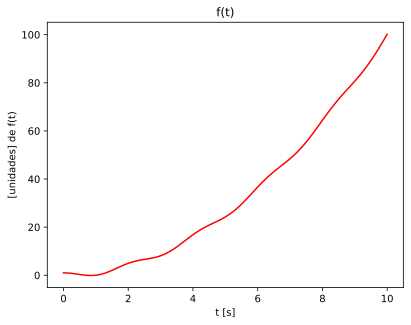

In [13]:
# Graficamos
fig,ax = plt.subplots()
ax.plot(lista_t,lista_f_t,color='red')
ax.set_title('f(t)')
ax.set_xlabel('t [s]');
ax.set_ylabel('[unidades] de f(t)');

## *Referencias*



*   [Introducción a Sympy.](https://docs.sympy.org/latest/tutorial/intro.html)
*   [Transformada de Laplace en Sympy.](https://dynamics-and-control.readthedocs.io/en/latest/1_Dynamics/3_Linear_systems/Laplace%20transforms.html)
*   [Matplotlib.](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)



